<a href="https://colab.research.google.com/github/Darshini-A/Deep-Learning/blob/main/BiLSTM%208%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import numpy as np
from keras.models import Sequential
from keras.preprocessing import sequence
from keras.layers import Dropout
from keras.layers import Dense, Embedding, LSTM, Bidirectional

In [20]:
from keras.datasets import imdb
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words = 10000)

In [21]:
max_len = 200
x_train = sequence.pad_sequences(x_train, maxlen = max_len)
x_test = sequence.pad_sequences(x_test, maxlen = max_len)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [22]:
x_train.shape, y_train.shape

((25000, 200), (25000,))

In [23]:
x_test.shape, y_test.shape

((25000, 200), (25000,))

In [24]:
n_unique_words = 10000

model = Sequential()
model.add(Embedding(n_unique_words, 128, input_length = max_len))
model.add(Bidirectional(LSTM(64)))
model.add(Dropout(0.5))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [25]:
batch_size = 300

history = model.fit(x_train, y_train,
                    batch_size = batch_size,
                    epochs = 5,
                    validation_data = [x_test, y_test])

print(history.history['loss'])
print(history.history['accuracy'])

Epoch 1/5
84/84 [==============================] - 15s 145ms/step - loss: 0.5007 - accuracy: 0.7400 - val_loss: 0.3183 - val_accuracy: 0.8663
Epoch 2/5
84/84 [==============================] - 9s 107ms/step - loss: 0.2623 - accuracy: 0.9003 - val_loss: 0.3304 - val_accuracy: 0.8588
Epoch 3/5
84/84 [==============================] - 7s 83ms/step - loss: 0.1971 - accuracy: 0.9306 - val_loss: 0.3343 - val_accuracy: 0.8665
Epoch 4/5
84/84 [==============================] - 6s 70ms/step - loss: 0.1413 - accuracy: 0.9520 - val_loss: 0.3600 - val_accuracy: 0.8570
Epoch 5/5
84/84 [==============================] - 5s 57ms/step - loss: 0.1328 - accuracy: 0.9537 - val_loss: 0.4210 - val_accuracy: 0.8543
[0.5007269382476807, 0.26229459047317505, 0.1970617026090622, 0.14126327633857727, 0.13281454145908356]
[0.7400000095367432, 0.9003199934959412, 0.9305599927902222, 0.9520000219345093, 0.953719973564148]


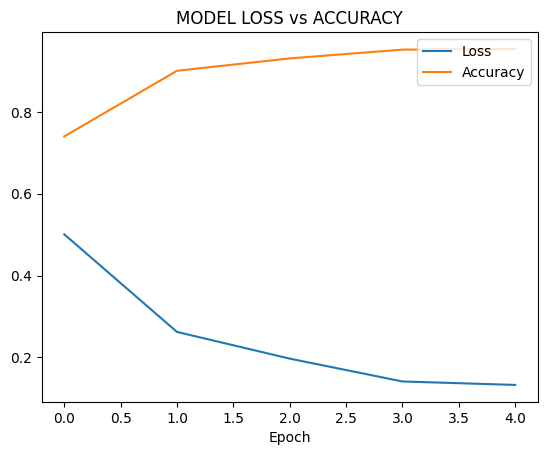

In [26]:
from matplotlib import pyplot
pyplot.plot(history.history['loss'])
pyplot.plot(history.history['accuracy'])
pyplot.title('MODEL LOSS vs ACCURACY')
pyplot.xlabel('Epoch')
pyplot.legend(['Loss', 'Accuracy'], loc = 'upper right')
pyplot.show()